In [ ]:
import pandas as pd
df = pd.read_csv("visa_dataset.csv")

df.head()

,Application_id,Application_status,Application_date,Decision_date,Visa_type,Job_title,Occupation_category,Wage,Worksite_city,Worksite_state,Processing_days
0,I-203-16342-399001,CERTIFIED,2016-12-16,2016-12-22,E-3 Australian,US BUSINESS DEVELOPMENT OFFICER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,73299.0,SAN FRANCISCO,CA,6
1,I-203-17101-215404,CERTIFIED,2017-04-11,2017-04-17,E-3 Australian,INTEGRITY RESPONSIBILITY ENGINEER,MECHANICAL ENGINEERS,43.7,AUBURN HILLS,MI,6
2,I-203-17069-446167,CERTIFIED,2017-03-10,2017-03-16,E-3 Australian,SENIOR MANAGING EDITOR,EDITORS,73611.0,SAN DIEGO,CA,6
3,I-203-17020-045179,CERTIFIED,2017-01-20,2017-01-26,E-3 Australian,SPATIAL AUDIO SPECIALIST,COMMERCIAL AND INDUSTRIAL DESIGNERS,77168.0,SAN DIEGO,CA,6
4,I-203-17025-949357,CERTIFIED,2017-01-25,2017-01-31,E-3 Australian,"DIRECTOR, SOFTWARE ENGINEERING",ARCHITECTURAL AND ENGINEERING MANAGERS,216382.0,PALO ALTO,CA,6


In [ ]:
df.tail()

,Application_id,Application_status,Application_date,Decision_date,Visa_type,Job_title,Occupation_category,Wage,Worksite_city,Worksite_state,Processing_days
79994,I-202-17157-605612,CERTIFIED,2017-06-06,2017-06-12,H-1B1 Singapore,PRODUCT MARKETING ANALYST,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,65062.0,SAN JOSE,CA,6
79995,I-202-16347-278819,CERTIFIED,2016-12-12,2016-12-16,H-1B1 Singapore,PRIVATE DINING CHEF,CHEFS AND HEAD COOKS,39104.0,CHICAGO,IL,4
79996,I-202-16348-281299,CERTIFIED,2016-12-13,2016-12-19,H-1B1 Singapore,MARKET RESEARCH ANALYST,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,54205.0,POWAY,CA,6
79997,I-202-17046-919053,CERTIFIED,2017-02-23,2017-03-01,H-1B1 Singapore,FINANCIAL ANALYST,FINANCIAL ANALYSTS,61734.0,SANTA MONICA,CA,6
79998,I-202-17202-133531,DENIED,2017-07-27,2017-07-31,H-1B1 Singapore,CHEF,CHEFS AND HEAD COOKS,35859.0,PALO ALTO,CA,4


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("visa_dataset.csv")

print(df.shape)
print(df.columns)
df.head()

(79999, 11)
Index(['Application_id', 'Application_status', 'Application_date',
       'Decision_date', 'Visa_type', 'Job_title', 'Occupation_category',
       'Wage', 'Worksite_city', 'Worksite_state', 'Processing_days'],
      dtype='object')


,Application_id,Application_status,Application_date,Decision_date,Visa_type,Job_title,Occupation_category,Wage,Worksite_city,Worksite_state,Processing_days
0,I-203-16342-399001,CERTIFIED,2016-12-16,2016-12-22,E-3 Australian,US BUSINESS DEVELOPMENT OFFICER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,73299.0,SAN FRANCISCO,CA,6
1,I-203-17101-215404,CERTIFIED,2017-04-11,2017-04-17,E-3 Australian,INTEGRITY RESPONSIBILITY ENGINEER,MECHANICAL ENGINEERS,43.7,AUBURN HILLS,MI,6
2,I-203-17069-446167,CERTIFIED,2017-03-10,2017-03-16,E-3 Australian,SENIOR MANAGING EDITOR,EDITORS,73611.0,SAN DIEGO,CA,6
3,I-203-17020-045179,CERTIFIED,2017-01-20,2017-01-26,E-3 Australian,SPATIAL AUDIO SPECIALIST,COMMERCIAL AND INDUSTRIAL DESIGNERS,77168.0,SAN DIEGO,CA,6
4,I-203-17025-949357,CERTIFIED,2017-01-25,2017-01-31,E-3 Australian,"DIRECTOR, SOFTWARE ENGINEERING",ARCHITECTURAL AND ENGINEERING MANAGERS,216382.0,PALO ALTO,CA,6


In [ ]:
df.columns = df.columns.str.lower().str.strip()

In [ ]:
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['decision_date'] = pd.to_datetime(df['decision_date'], errors='coerce')

In [ ]:
df['processing_days'] = (df['decision_date'] - df['application_date']).dt.days

In [ ]:
df = df[(df['processing_days'] >= 1) & (df['processing_days'] <= 240)]

In [ ]:
df['wage'] = df['wage'].fillna(df['wage'].median())

In [ ]:
for col in ['job_title','occupation_category','worksite_state','visa_type']:
    df[col] = df[col].fillna("UNKNOWN")

In [ ]:
df['month'] = df['application_date'].dt.month
df['day_of_week'] = df['application_date'].dt.dayofweek

In [ ]:
df.head()

,application_id,application_status,application_date,decision_date,visa_type,job_title,occupation_category,wage,worksite_city,worksite_state,processing_days,month,day_of_week
0,I-203-16342-399001,CERTIFIED,2016-12-16,2016-12-22,E-3 Australian,US BUSINESS DEVELOPMENT OFFICER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,73299.0,SAN FRANCISCO,CA,6,12,4
1,I-203-17101-215404,CERTIFIED,2017-04-11,2017-04-17,E-3 Australian,INTEGRITY RESPONSIBILITY ENGINEER,MECHANICAL ENGINEERS,43.7,AUBURN HILLS,MI,6,4,1
2,I-203-17069-446167,CERTIFIED,2017-03-10,2017-03-16,E-3 Australian,SENIOR MANAGING EDITOR,EDITORS,73611.0,SAN DIEGO,CA,6,3,4
3,I-203-17020-045179,CERTIFIED,2017-01-20,2017-01-26,E-3 Australian,SPATIAL AUDIO SPECIALIST,COMMERCIAL AND INDUSTRIAL DESIGNERS,77168.0,SAN DIEGO,CA,6,1,4
4,I-203-17025-949357,CERTIFIED,2017-01-25,2017-01-31,E-3 Australian,"DIRECTOR, SOFTWARE ENGINEERING",ARCHITECTURAL AND ENGINEERING MANAGERS,216382.0,PALO ALTO,CA,6,1,2


In [ ]:
def map_processing_center(state):
    west = ['CA','WA','OR','NV','AZ','UT','CO','ID','MT','WY','AK','HI']
    central = ['TX','OK','KS','NE','IA','MO','MN','ND','SD']
    east = ['NY','NJ','MA','CT','PA','VA','MD','DC','RI','NH','ME','VT']

    if state in west:
        return "WEST_CENTER"
    elif state in central:
        return "CENTRAL_CENTER"
    elif state in east:
        return "EAST_CENTER"
    else:
        return "SOUTH_CENTER"

df['processing_center'] = df['worksite_state'].apply(map_processing_center)

In [ ]:
q1 = df['wage'].quantile(0.01)
q99 = df['wage'].quantile(0.99)

df = df[(df['wage'] >= q1) & (df['wage'] <= q99)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in ['visa_type','occupation_category',
            'worksite_state','processing_center']:
    df[col] = enc.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['wage_scaled'] = scaler.fit_transform(df[['wage']])

In [ ]:
training_df = df[[
  'visa_type',
  'occupation_category',
  'wage_scaled',
  'worksite_state',
  'processing_center',
  'month',
  'day_of_week',
  'processing_days'
]]

In [ ]:
training_df.to_csv("visa_training_ready.csv", index=False)

print("Final shape:", training_df.shape)

Final shape: (78400, 8)


In [ ]:
df['processing_days'].describe()

,processing_days
count,78400.000000
mean,9.733941
std,24.136065
min,1.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,240.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# better plot visuals
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("visa_training_ready.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (78400, 8)


,visa_type,occupation_category,wage_scaled,worksite_state,processing_center,month,day_of_week,processing_days
0,0,292,0.024858,4,3,12,4,6
1,0,305,-2.481401,23,2,4,1,6
2,0,155,0.035532,4,3,3,4,6
3,0,85,0.157227,4,3,1,4,6
4,0,168,1.240331,4,3,8,4,6


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78400 entries, 0 to 78399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visa_type            78400 non-null  int64  
 1   occupation_category  78400 non-null  int64  
 2   wage_scaled          78400 non-null  float64
 3   worksite_state       78400 non-null  int64  
 4   processing_center    78400 non-null  int64  
 5   month                78400 non-null  int64  
 6   day_of_week          78400 non-null  int64  
 7   processing_days      78400 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 4.8 MB


,visa_type,occupation_category,wage_scaled,worksite_state,processing_center,month,day_of_week,processing_days
count,78400.000000,78400.000000,7.840000e+04,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000
mean,0.986696,235.089758,-3.608905e-16,25.077666,1.664107,4.959796,2.171913,9.733941
std,0.165645,147.622001,1.000006e+00,16.436923,1.034813,3.219990,1.513204,24.136065
min,0.000000,0.000000,-2.482131e+00,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,108.000000,-5.152574e-01,9.000000,1.000000,3.000000,1.000000,6.000000
50%,1.000000,168.000000,-7.689052e-02,24.000000,2.000000,3.000000,2.000000,6.000000
75%,1.000000,436.000000,5.493381e-01,39.000000,3.000000,7.000000,3.000000,6.000000
max,3.000000,495.000000,3.298326e+00,54.000000,3.000000,12.000000,6.000000,240.000000


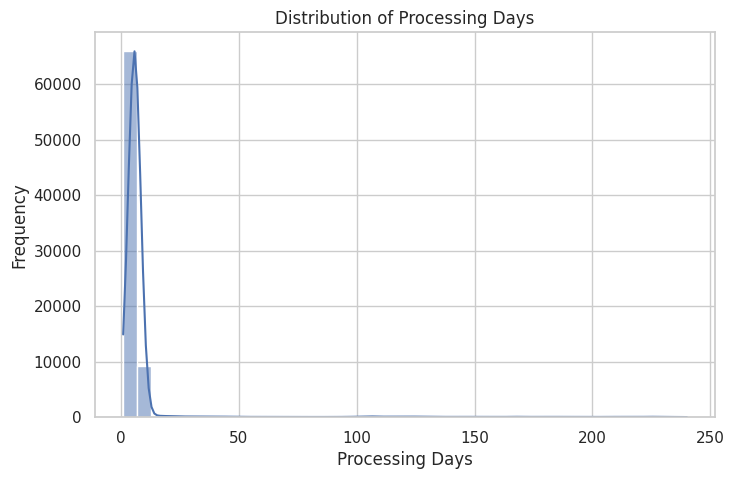

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['processing_days'], bins=40, kde=True)
plt.title("Distribution of Processing Days")
plt.xlabel("Processing Days")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['processing_days'].describe()

,processing_days
count,78400.000000
mean,9.733941
std,24.136065
min,1.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,240.000000


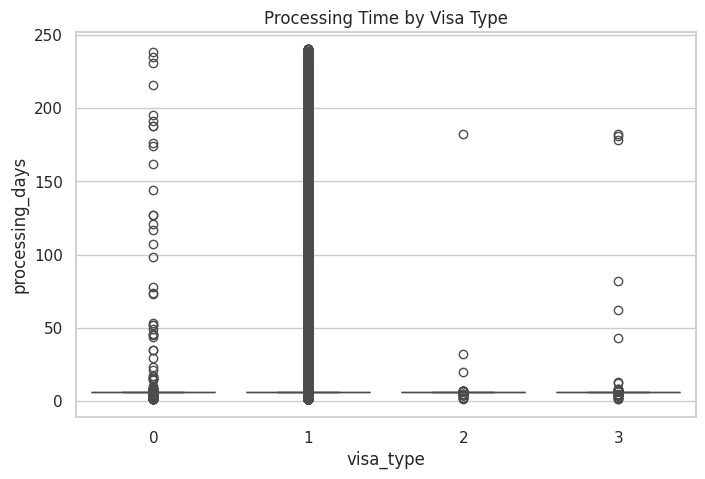

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='visa_type', y='processing_days', data=df)
plt.title("Processing Time by Visa Type")
plt.show()

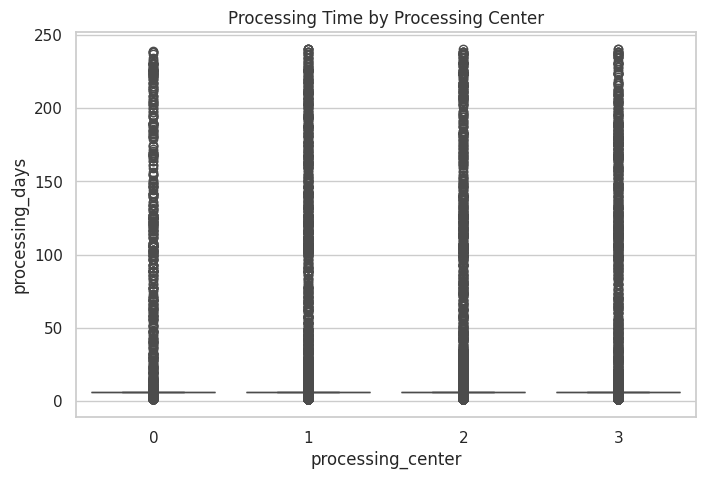

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='processing_center', y='processing_days', data=df)
plt.title("Processing Time by Processing Center")
plt.show()

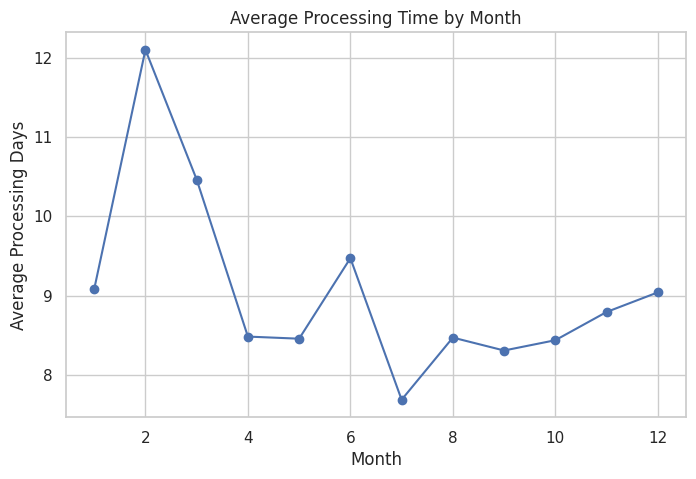

In [ ]:
monthly_avg = df.groupby('month')['processing_days'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(marker='o')
plt.title("Average Processing Time by Month")
plt.xlabel("Month")
plt.ylabel("Average Processing Days")
plt.show()

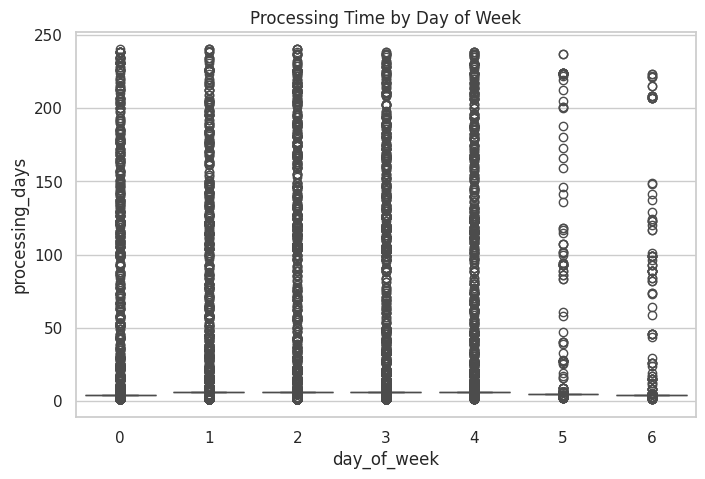

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week', y='processing_days', data=df)
plt.title("Processing Time by Day of Week")
plt.show()

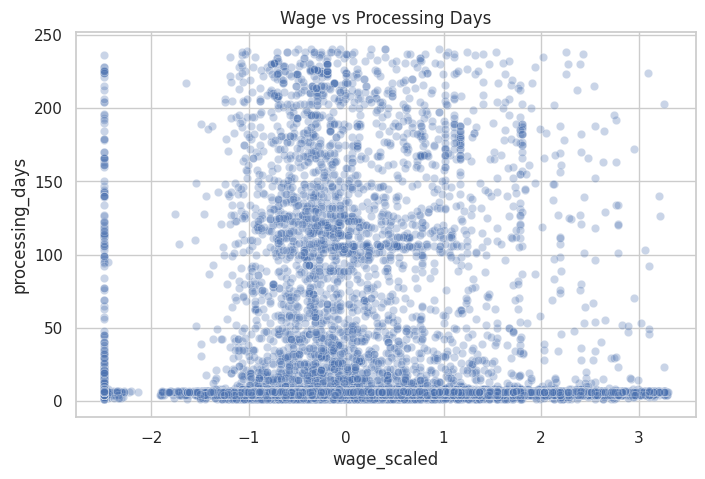

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='wage_scaled', y='processing_days', data=df, alpha=0.3)
plt.title("Wage vs Processing Days")
plt.show()

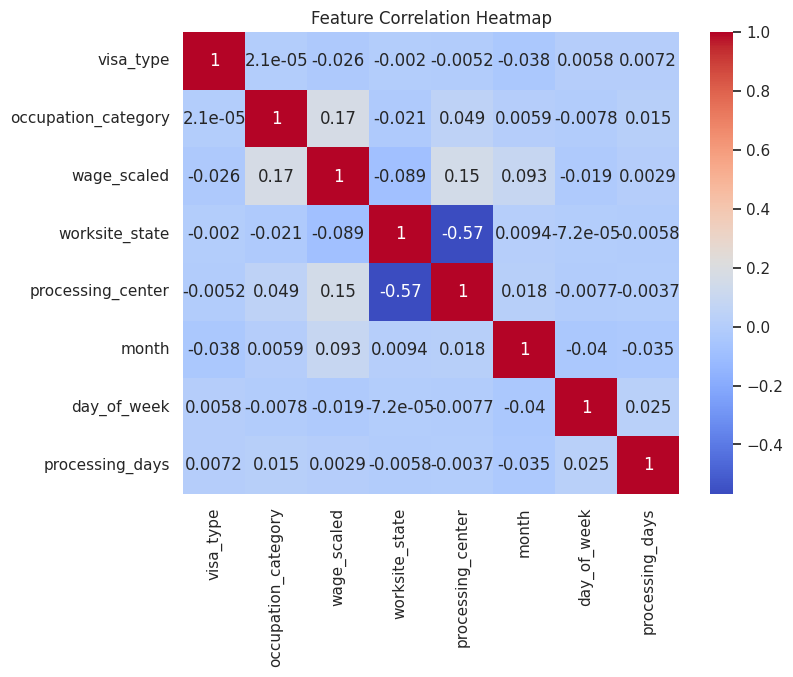

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

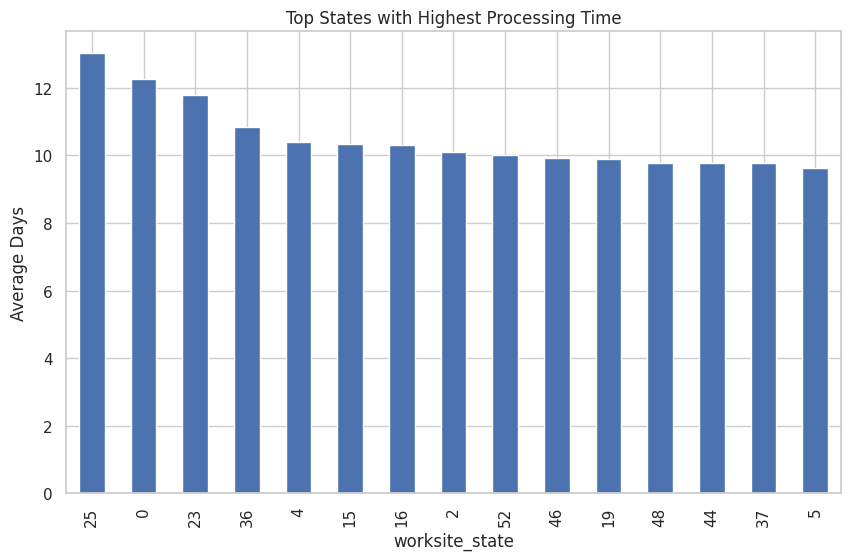

In [ ]:
state_avg = df.groupby('worksite_state')['processing_days'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_avg.head(15).plot(kind='bar')
plt.title("Top States with Highest Processing Time")
plt.ylabel("Average Days")
plt.show()

In [ ]:
df.groupby('processing_center')['processing_days'].mean()

,processing_days
processing_center,
0,9.973043
1,9.783240
2,9.563303
3,9.715954
